In [3]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns
import sys
sys.path.append('/Users/kook/insight/windsite/src')
import imp
import maps
imp.reload(maps)
import maps
%matplotlib inline

In [182]:
usw_df.columns

Index(['case_id', 'faa_ors', 'faa_asn', 'usgs_pr_id', 'eia_id', 't_state',
       't_county', 't_fips', 'p_name', 'p_year', 'p_tnum', 'p_cap', 't_manu',
       't_model', 't_cap', 't_hh', 't_rd', 't_rsa', 't_ttlh', 't_conf_atr',
       't_conf_loc', 't_img_date', 't_img_srce', 'xlong', 'ylat'],
      dtype='object')

In [5]:
import imp
import sys
#sys.path.append('/Users/kook/insight/windsite/src')
import cf_model
imp.reload(cf_model)
import cf_model
clean_data = cf_model.clean_data('../')

In [270]:
clean_data.columns

Index(['elevation', 'mean_wind_speed', 'pow_curve', 'temperature', 'p_year',
       't_state', 'eia_id', 't_cap_factor', 'p_cap_factor', 't_cap_factor_18',
       'p_cap_factor_18', 't_cap <lambda>', 'p_cap max', 'latitude',
       'longitude'],
      dtype='object')

In [6]:
large_only = clean_data[clean_data['p_cap max'] > 10]

In [236]:
len(large_only)

779

In [7]:
#not_ca_data = clean_data[clean_data['t_state'] != 'CA']
#not_ca_data#
non_holdout = large_only[large_only['t_state'] != 'TX']
holdout = large_only[large_only['t_state'] == 'TX']
#non_holdout = clean_data.iloc[200:]
#holdout = clean_data.iloc[:200]
df = non_holdout

# eda

In [36]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
def usa_color_scatter(ax,*args,**kwargs):
    plt.axis('off')
    maps.get_conusa_gdf().plot(color='none',edgecolor='black',ax=ax)
    im = ax.scatter(*args,**kwargs)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(im, cax=cax)
    #cbar.ax.set_yticklabels(['$1000','$10,000','$100,000'])
    ax.set_title('Capacity Factor')
    plt.show()

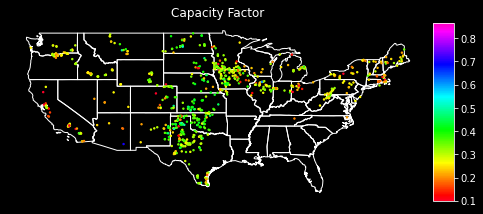

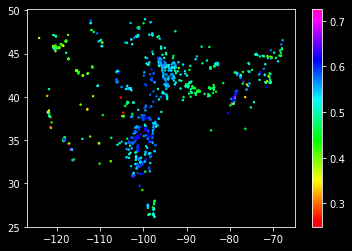

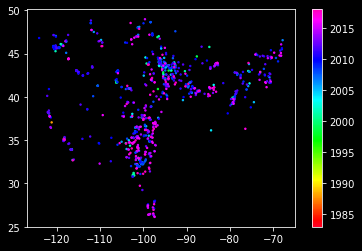

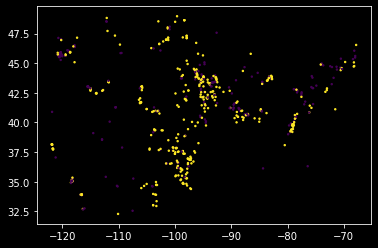

In [408]:

fig, ax = plt.subplots(figsize=(8,8))
usa_color_scatter(ax,clean_data['longitude'],clean_data['latitude'],
            c=clean_data['t_cap_factor'],s=2,cmap='gist_rainbow',vmin=0.1)
plt.show()
plt.scatter(clean_data['longitude'],clean_data['latitude'],c=clean_data['pow_curve'],s=2,cmap='gist_rainbow')
plt.colorbar(); plt.show()
plt.scatter(clean_data['longitude'],clean_data['latitude'],c=clean_data['p_year'],s=2,cmap='gist_rainbow')
plt.colorbar(); plt.show()
plt.scatter(non_holdout['longitude'],non_holdout['latitude'],c=y,s=2); plt.show()

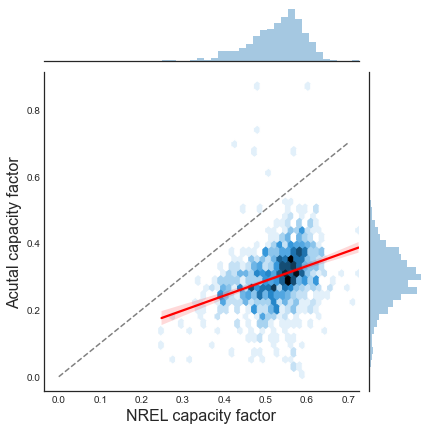

In [194]:
#fig, ax = plt.subplots(figsize=(10,10))
hexplot = sns.jointplot(clean_data['pow_curve'],y=clean_data['t_cap_factor'],kind='hex')
sns.regplot(clean_data['pow_curve'],y=clean_data['t_cap_factor'],
            ax=hexplot.ax_joint, scatter=False,color='red')
#hexplot.ax_joint.set_axis_labels('NREL capacity factor','Actual capacity factor',fontsize=16)
hexplot.ax_joint.set_xlabel('NREL capacity factor',fontsize=16)
hexplot.ax_joint.set_ylabel('Acutal capacity factor',fontsize=16)
#plt.ylabel('Actual capacity factor',fontsize=16)
#plt.xlabel('NREL estimated capacity factor',fontsize=16)
hexplot.ax_joint.plot([0,0.7],[0,0.7],linestyle='--',c='gray')
#plt.legend()
#plt.gca().set_aspect(aspect=1)
#plt.savefig('/Users/kook/insight/figs/nrel-vs-real-capacity-hex.png',bbox_inches='tight',transparent=True)

(0.07969958273010325, 0.01420688523284582)

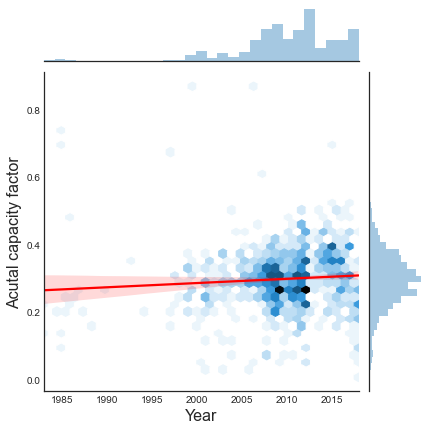

In [117]:
#fig, ax = plt.subplots(figsize=(10,10))
hexplot = sns.jointplot(clean_data['p_year'],y=clean_data['t_cap_factor'],kind='hex')
test = sns.regplot(clean_data['p_year'],y=clean_data['t_cap_factor'],
           ax=hexplot.ax_joint, scatter=False,color='red')
#hexplot.ax_joint.set_axis_labels('NREL capacity factor','Actual capacity factor',fontsize=16)
hexplot.ax_joint.set_xlabel('Year',fontsize=16)
hexplot.ax_joint.set_ylabel('Acutal capacity factor',fontsize=16)
pearsonr(clean_data['p_year'],y=clean_data['t_cap_factor'])
#plt.legend()
#plt.gca().set_aspect(aspect=1)
#plt.savefig('/Users/kook/insight/figs/nrel-vs-real-capacity.png',bbox_inches='tight')

(0.09163797927871052, 0.004791450664732238)

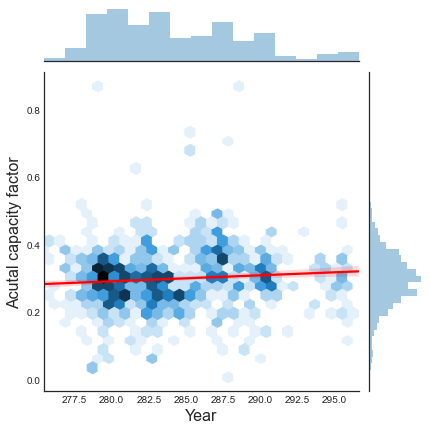

In [116]:
#fig, ax = plt.subplots(figsize=(10,10))
hexplot = sns.jointplot(clean_data['temperature'],y=clean_data['t_cap_factor'],kind='hex')
test = sns.regplot(clean_data['temperature'],y=clean_data['t_cap_factor'],
           ax=hexplot.ax_joint, scatter=False,color='red')
#hexplot.ax_joint.set_axis_labels('NREL capacity factor','Actual capacity factor',fontsize=16)
hexplot.ax_joint.set_xlabel('Year',fontsize=16)
hexplot.ax_joint.set_ylabel('Acutal capacity factor',fontsize=16)
pearsonr(clean_data['temperature'],y=clean_data['t_cap_factor'])
#plt.legend()
#plt.gca().set_aspect(aspect=1)
#plt.savefig('/Users/kook/insight/figs/nrel-vs-real-capacity.png',bbox_inches='tight')

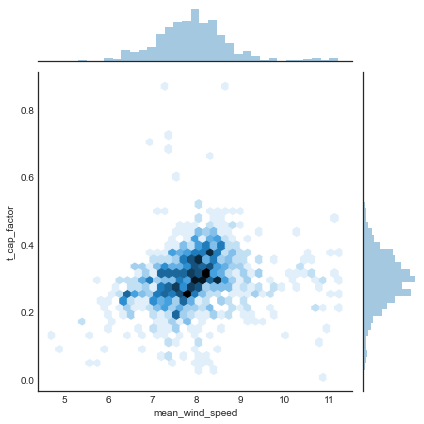

In [161]:
sns.jointplot(clean_data['mean_wind_speed'],y=clean_data['t_cap_factor'],kind='hex')

In [115]:
from scipy.stats import pearsonr


(0.09163797927871052, 0.004791450664732238)

In [113]:
pearsonr(clean_data['pow_curve'],y=clean_data['t_cap_factor'])

(0.33319122675699653, 5.833039594897368e-26)

In [162]:
pearsonr(clean_data['mean_wind_speed'],y=clean_data['t_cap_factor'])

(0.21162133059663601, 4.8699382997331486e-11)

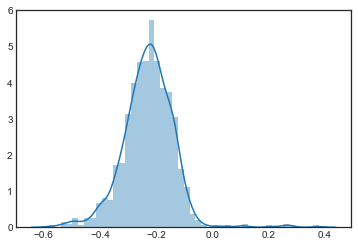

In [103]:
sns.distplot(clean_data['t_cap_factor']-clean_data['pow_curve'])

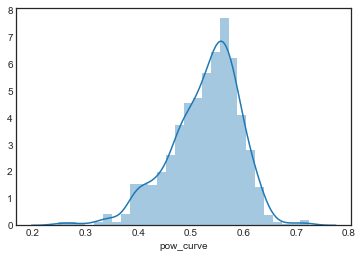

In [219]:
sns.distplot(clean_data['pow_curve'])

In [74]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
def usa_color_scatter2(ax,*args,**kwargs):
    plt.axis('off')
    maps.get_conusa_gdf().plot(color='gray',edgecolor='black',ax=ax)
    im = ax.scatter(*args,**kwargs)
    maps.get_state_gdf('TX').plot(color='none',edgecolor='cyan',linewidth=4,ax=ax)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(im, cax=cax)
    #cbar.ax.set_yticklabels(['$1000','$10,000','$100,000'])

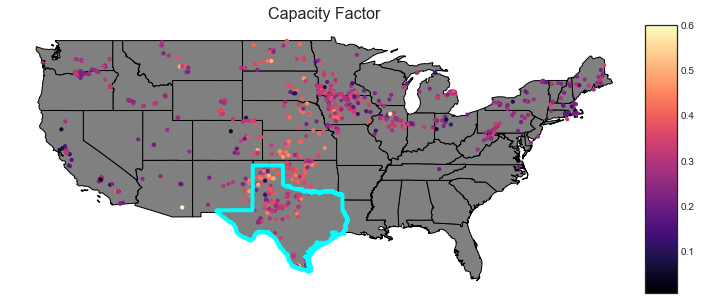

In [76]:
fig, ax = plt.subplots(figsize=(12,10))
usa_color_scatter2(ax,clean_data['longitude'],clean_data['latitude'],
            c=clean_data['t_cap_factor'],s=10,cmap='magma',vmax=0.6)
ax.set_title('Capacity Factor',fontsize=16)
#plt.savefig('../../figs/us-capacity-fig-tx-highlight.png',transparent=True,bbox_inches='tight')
plt.show()

# model

319 / 633
0.5039494470774092
y mean 0.5039494470774092
y std 0.4999844016244734


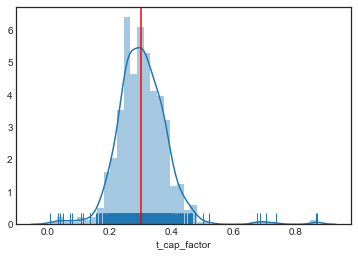

In [213]:
from sklearn.preprocessing import Binarizer
#data = df_bigfarms
data = df
#features = ['elevation','pow_curve','temperature','p_year','longitude','latitude']
#features = ['pow_curve','mean_wind_speed','p_year','longitude','latitude']
features = ['longitude','pow_curve','p_year']
# X = pd.concat([
#     df[['elevation','latitude','longitude']],
#     pd.DataFrame(test_feature/np.max(test_feature))
# ],axis=1)
X = data[features]
y_continuous = data['t_cap_factor']
y = y_continuous.to_numpy().reshape(-1,1)
binarizer = Binarizer(threshold=0.3).fit(y)
y = binarizer.transform(y).reshape(-1)
print(np.count_nonzero(y),'/',len(y))
print(np.count_nonzero(y)/len(y))
fig,ax = plt.subplots()
sns.distplot(y_continuous,rug=True,ax=ax,norm_hist=False)
ax.axvline(0.3,c='red')
print('y mean',np.mean(y))
print('y std',np.std(y))

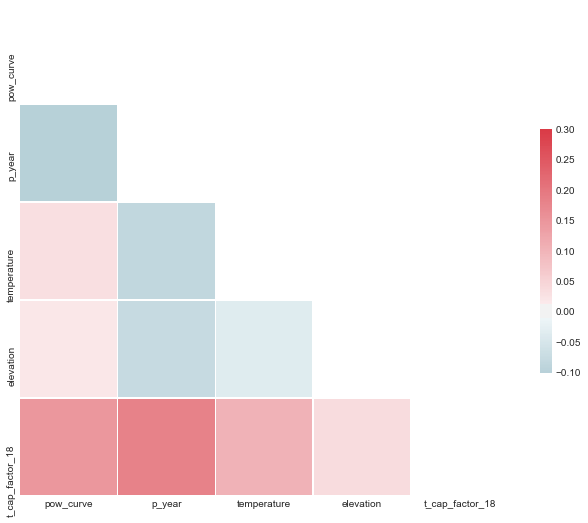

In [30]:
# Compute the correlation matrix
#corr = df[features + ['p_cap_factor_18','t_cap_factor_18', 'p_cap_factor','t_cap_factor']].corr()
corr = df[features + ['temperature','elevation','t_cap_factor_18']].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

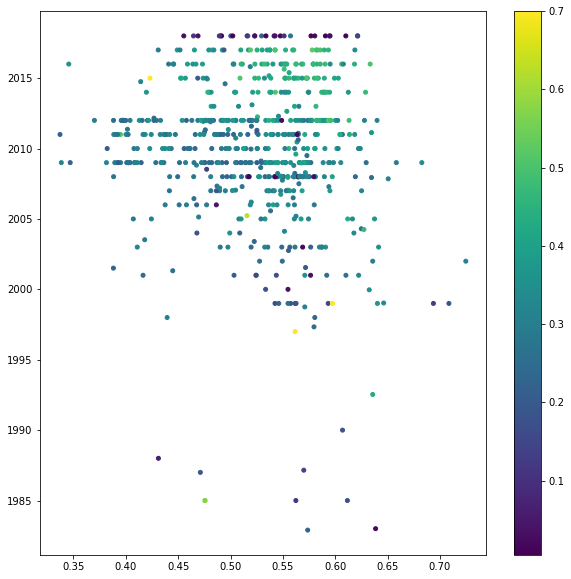

In [393]:
fig,ax = plt.subplots(figsize=(10,10))
plt.scatter(df['pow_curve'],df['p_year'],c=df['t_cap_factor_18'],vmax=0.7,s=16); plt.colorbar()

cross validation scores: [0.69565217 0.7434555  0.71917808]
mean,std 0.7194285844956744 0.01951642892927849
training data
0.8616352201257862
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86       157
         1.0       0.86      0.86      0.86       159

    accuracy                           0.86       316
   macro avg       0.86      0.86      0.86       316
weighted avg       0.86      0.86      0.86       316

testing data
0.7630769230769231
              precision    recall  f1-score   support

         0.0       0.76      0.74      0.75       157
         1.0       0.75      0.78      0.76       160

    accuracy                           0.76       317
   macro avg       0.76      0.76      0.76       317
weighted avg       0.76      0.76      0.76       317



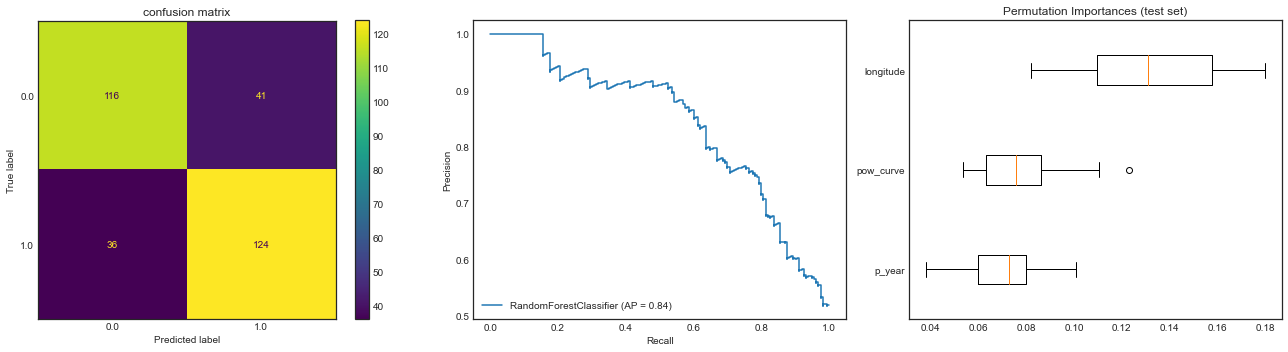

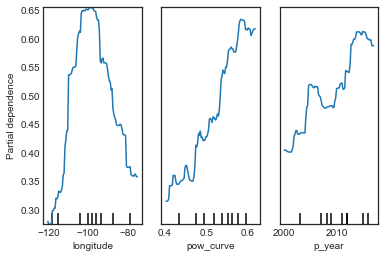

In [214]:
import models
imp.reload(models)
import models
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import Lasso, BayesianRidge
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import AdaBoostClassifier
model = RandomForestClassifier(n_estimators=400,max_depth=4)
#model = LogisticRegressionCV()
#model = GaussianNB()
#model = AdaBoostClassifier(n_estimators=200)
#random state 55, p_cap factor 18
model, (X_train, X_test, y_train, y_test) = models.test_classifier(model,X,y,return_data=True,
                                                                   random_state=2,plot_partial=True)

In [205]:
X_test.columns[sorted_idx]

Index(['p_year', 'pow_curve', 'longitude'], dtype='object')

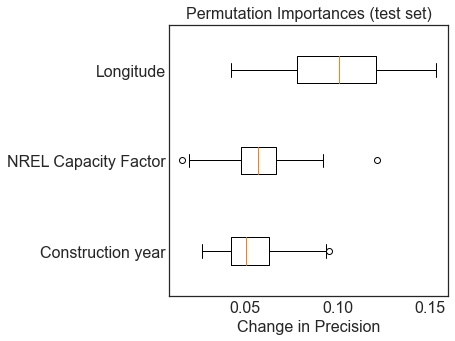

In [208]:
from sklearn.inspection import permutation_importance
fig,ax = plt.subplots(figsize=(5,5))
plt.style.use('seaborn-white')
# result = permutation_importance(model, X_test, y_test, n_repeats=40,
#                                random_state=2, n_jobs=1,scoring='precision')
# sorted_idx = result.importances_mean.argsort()

labels = ['Construction year','NREL Capacity Factor','Longitude']
#labels = ['Temperature', 'Elevation', 'Latitude', 'Construction year', 'NREL Capacity factor','Longitude']
#labels = X_test.columns[sorted_idx]
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=labels)

plt.title("Permutation Importances (test set)",fontsize=16)
plt.xlabel('Change in Precision',fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)
#plt.ylabel(fontsize=16)
#plt.xlim(0,0.16)
#fig.tight_layout()
#plt.savefig('../../figs/perm-importance-3feat.png',transparent=True,bbox_inches='tight')
#plt.show()

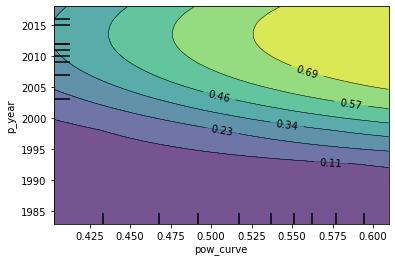

In [371]:
from sklearn.inspection import plot_partial_dependence
plot_partial_dependence(model,X_test,[(0,1)])

In [ ]:
plt.scatter()

0.85 0.425


0.7420621909792579

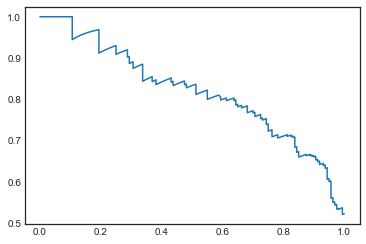

In [180]:
from sklearn.metrics import precision_recall_curve
pred_probs = model.predict_proba(X_test)
y_pred = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test,pred_probs[:,1])
plt.plot(recall,precision)
idx = np.argmin(np.abs(precision-0.85))
print(precision[idx],recall[idx])
best_threshold = thresholds[idx]
best_threshold

In [215]:
y_prob_pred = models.pred_thresh(model,X_test,th=best_threshold)
cm = confusion_matrix(y_test,y_prob_pred)
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)
print(tp/(tp+fp))

151 6 105 55
0.9016393442622951


In [218]:
import pickle as pkl
# with fopen('../models/cf-model-17.pkl','wb') as f:
#     pkl.dump(model,f)

## plot learning curves

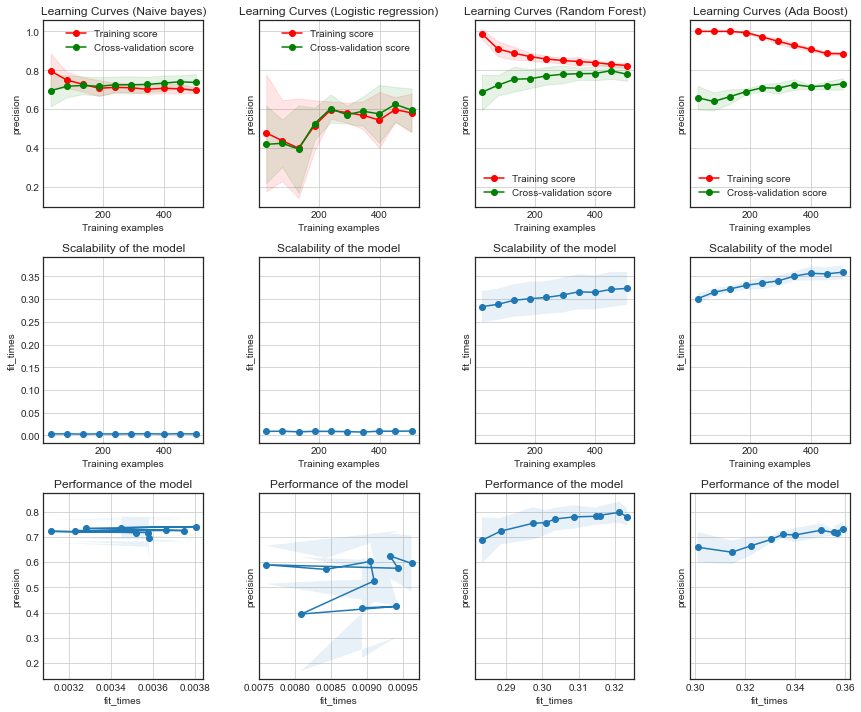

In [210]:
from sklearn.model_selection import ShuffleSplit
fig, axes = plt.subplots(3, 4, figsize=(12, 10),sharey='row')


title = "Learning Curves (Naive bayes)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=2)
estimator = GaussianNB()
models.plot_learning_curve(estimator, title, X, y, axes=axes[:, 0],
                    cv=cv, n_jobs=4,scoring='precision',train_sizes=train_sizes)

title = "Learning Curves (Logistic regression)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=2)
estimator = LogisticRegression()
models.plot_learning_curve(estimator, title, X, y, axes=axes[:, 1],
                    cv=cv, n_jobs=4,scoring='precision',train_sizes=train_sizes)

title = "Learning Curves (Random Forest)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=2)
train_sizes = train_sizes=np.linspace(.05, 1.0, 10)
estimator = RandomForestClassifier(n_estimators=200,max_depth=4)
models.plot_learning_curve(estimator, title, X, y, axes=axes[:, 2],
                    cv=cv, n_jobs=4,scoring='precision',train_sizes=train_sizes)

title = "Learning Curves (Ada Boost)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=2)
train_sizes = train_sizes=np.linspace(.05, 1.0, 10)
estimator = AdaBoostClassifier(n_estimators=200)
models.plot_learning_curve(estimator, title, X, y, axes=axes[:, 3],
                    cv=cv, n_jobs=4,scoring='precision',train_sizes=train_sizes)




plt.tight_layout()
plt.show()

## validation?

In [216]:
X_val = holdout[features]
y_val = holdout['p_cap_factor'].to_numpy().reshape(-1,1)
y_val = binarizer.transform(y_val).reshape(-1)
print(len(X_val))
from sklearn.metrics import confusion_matrix
y_pred = models.pred_thresh(model,X_val,th=best_threshold)
#y_pred = model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
tn, fp, fn, tp = cm.ravel()
print(tn,fp,fn,tp)
print(tp/(tp + fp))
print((tp+fn)/len(y_pred))

146
24 24 26 72
0.75
0.6712328767123288


In [259]:
len(large_only)

779

In [255]:
large_only

714

In [262]:
states = non_holdout['t_state'].unique()
hmm = [(lambda x: (state,np.count_nonzero(x),len(x)))(y[non_holdout['t_state'] == state]) for state in states]

In [263]:
hmm

[('WI', 2, 5),
 ('WA', 12, 19),
 ('IA', 44, 59),
 ('TX', 106, 146),
 ('OR', 9, 31),
 ('MN', 29, 49),
 ('WY', 13, 19),
 ('KS', 28, 33),
 ('CO', 16, 22),
 ('NY', 4, 22),
 ('PA', 11, 23),
 ('WV', 4, 6),
 ('ND', 20, 28),
 ('OK', 45, 51),
 ('SD', 9, 11),
 ('NM', 11, 18),
 ('NE', 14, 16),
 ('IL', 13, 28),
 ('ID', 15, 31),
 ('MT', 5, 9),
 ('NH', 0, 4),
 ('MI', 16, 23),
 ('ME', 8, 14),
 ('TN', 0, 1),
 ('MO', 3, 7),
 ('IN', 6, 13),
 ('UT', 0, 4),
 ('VT', 1, 3),
 ('AZ', 1, 4),
 ('NV', 0, 1),
 ('MD', 3, 5),
 ('MA', 2, 2),
 ('OH', 3, 5),
 ('RI', 1, 1),
 ('NC', 0, 1)]

In [250]:
print(tn+fp)

50
